In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
car=pd.read_csv('/content/car.csv')

In [ ]:
car.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
car.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

In [ ]:
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
print(car['fuel'].value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


In [ ]:
print(car['seller_type'].value_counts())

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64


In [ ]:
print(car['transmission'].value_counts())

Manual       3892
Automatic     448
Name: transmission, dtype: int64


In [ ]:
fuel_type = car['fuel']
seller_type = car['seller_type']
transmission_type = car['transmission']
selling_price = car['selling_price']

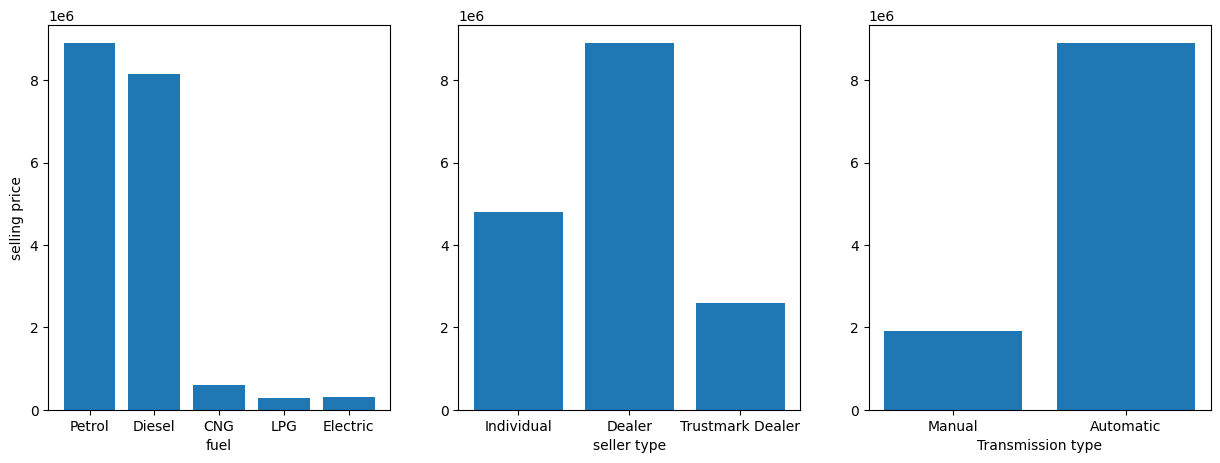

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price)
plt.xlabel("fuel")
plt.ylabel("selling price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price)
plt.xlabel("seller type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price)
plt.xlabel('Transmission type')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import style

<Axes: xlabel='transmission', ylabel='selling_price'>

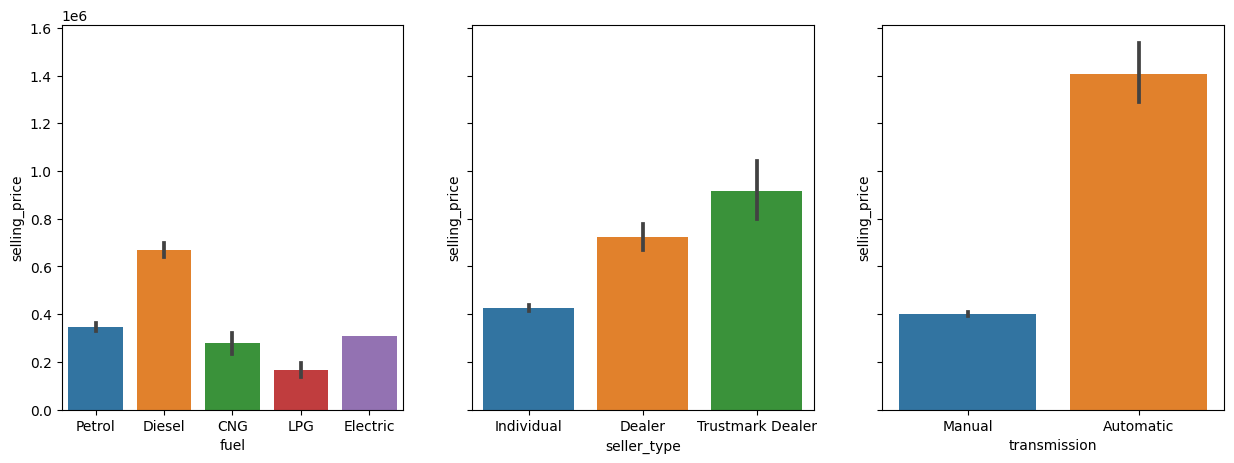

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

In [ ]:
petrol_data = car.groupby('fuel').get_group('Petrol')
petrol_data.describe()

year  selling_price      km_driven
count  2123.000000   2.123000e+03    2123.000000
mean   2012.595855   3.448401e+05   52340.079604
std       4.847011   3.636728e+05   38109.196219
min    1992.000000   2.000000e+04     101.000000
25%    2009.000000   1.500000e+05   25000.000000
50%    2014.000000   2.690000e+05   50000.000000
75%    2017.000000   4.500000e+05   70000.000000
max    2020.000000   8.900000e+06  806599.000000

In [ ]:
seller_data = car.groupby('seller_type').get_group('Dealer')
seller_data.describe()

year  selling_price      km_driven
count   994.000000   9.940000e+02     994.000000
mean   2014.200201   7.218229e+05   52827.259557
std       3.332098   8.599559e+05   47552.761406
min    1998.000000   2.200000e+04     101.000000
25%    2012.000000   3.100000e+05   27337.500000
50%    2015.000000   4.950000e+05   49000.000000
75%    2017.000000   7.500000e+05   66000.000000
max    2020.000000   8.900000e+06  806599.000000

In [ ]:
car.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
car.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
car=pd.get_dummies(car,columns=['seller_type','transmission'],drop_first=True)

<ipython-input-18-550b73b48fa5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car.corr(),annot=True)


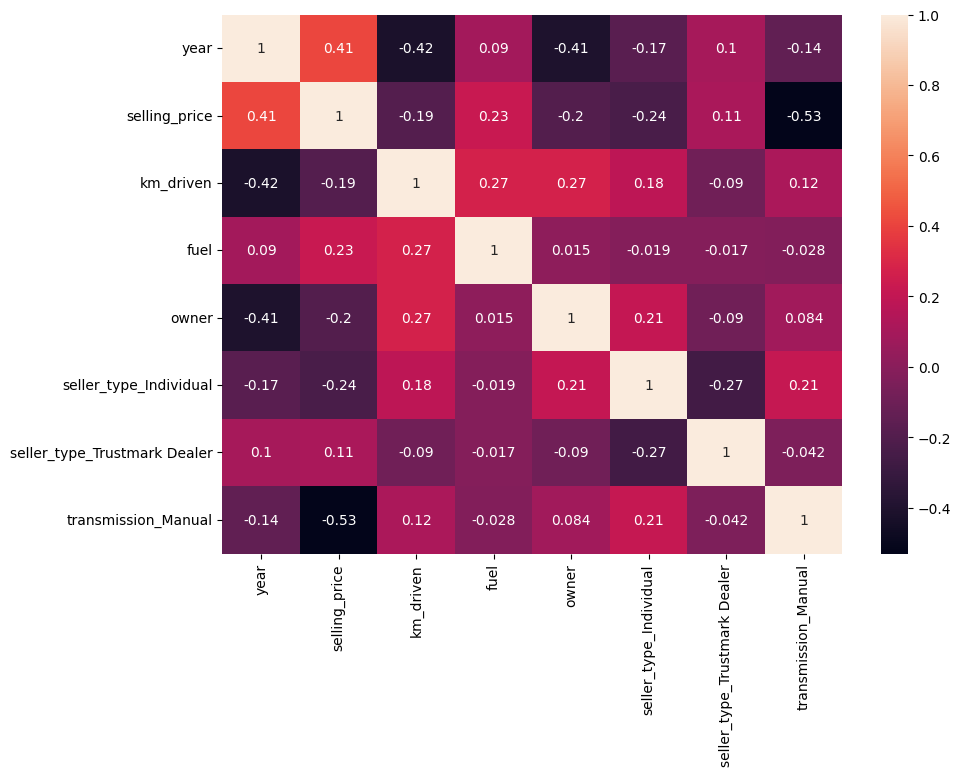

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(car.corr(),annot=True)
plt.show()

In [ ]:
X=car.drop(['name','selling_price'],axis=1)
y=car['selling_price']

In [ ]:
print("shape of X is:",X.shape)
print("shape of y is:",y.shape)

shape of X is: (4340, 7)
shape of y is: (4340,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (1302, 7)
X_train shape: (3038, 7)
y_test shape:  (1302,)
y_train shape: (3038,)


In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test-scaler.transform(X_test)

year      km_driven      fuel     owner  seller_type_Individual  \
2603  2007.658769   40000.556382  0.964719  0.283742                0.416315   
1391  2016.838900   52000.304897  0.144336  0.625291                0.416315   
4040  2016.073890   51000.325854  0.964719  0.625291                1.713252   
2899  2012.248835   42000.514468  0.964719  0.283742                1.713252   
3765  2012.248835  119998.879811  0.144336  0.283742                0.416315   
...           ...            ...       ...       ...                     ...   
299   2016.838900   14682.086996  0.144336  0.625291                1.713252   
3249  2015.308879   89999.508525  0.144336  0.625291                0.416315   
2960  2007.658769   60000.137239  0.964719  0.283742                0.416315   
3734  2013.013846  222248.736902  0.144336  0.625291                0.416315   
2821  2008.423780   40000.556382  0.964719  0.283742                0.416315   

      seller_type_Trustmark Dealer  transmission_Manual  
2603                      0.156909             0.658076  
1391                      0.156909             0.658076  
4040                      0.156909             0.658076  
2899                      0.156909             0.658076  
3765                      0.156909             0.658076  
...                            ...                  ...  
299                       0.156909             0.658076  
3249                      0.156909             0.658076  
2960                      0.156909             0.658076  
3734                      0.156909             0.658076  
2821                      0.156909             0.658076  

[1302 rows x 7 columns]

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = lm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

MAE:  1629453230.3365462
MSE:  4.3039953563054684e+18
R2 score:  -1.516466152543439


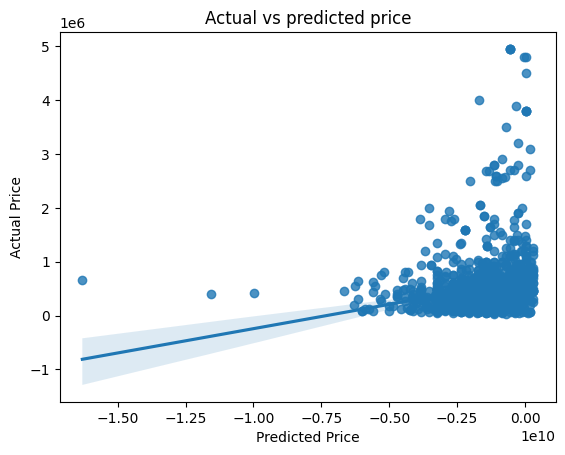

In [ ]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()